In [1]:
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
endpoint = 'https://min-api.cryptocompare.com/data/histoday'
res = requests.get(endpoint + '?fsym=XRP&tsym=USD&limit=1000')
hist = pd.DataFrame(json.loads(res.content)['Data'])

In [3]:
hist.head()

,time,close,high,low,open,volumefrom,volumeto
0,1518048000,0.7810,0.7887,0.7110,0.7157,1.610547e+08,1.215295e+08
1,1518134400,0.9201,0.9280,0.7407,0.7810,2.542085e+08,2.163173e+08
2,1518220800,1.0300,1.2300,0.9058,0.9201,5.564432e+08,5.816818e+08
3,1518307200,0.9607,1.0400,0.8925,1.0300,2.799288e+08,2.702805e+08
4,1518393600,1.0400,1.0800,0.9574,0.9607,2.021059e+08,2.088324e+08


In [4]:
hist['time'] = pd.to_datetime(hist['time'], unit='s')

In [5]:
data = hist.drop("high", axis=1)

In [6]:
data = data.drop(["low", "open", "volumefrom", "volumeto"], axis=1)

In [7]:
#time series 
import fbprophet

Importing plotly failed. Interactive plots will not work.


In [8]:
#model initialze 

from fbprophet import Prophet
m= Prophet()

In [9]:
m.add_seasonality(name="daily",period=30.5,fourier_order=5)

In [10]:
data.shape

(1001, 2)

In [11]:
def train_test_split(df, test_size=0.2):
    split_row = len(df) - int(test_size * len(df))
    train_data = df.iloc[:split_row]
    test_data = df.iloc[split_row:]
    return train_data, test_data

In [12]:
train, test = train_test_split(data, test_size=0.2)

In [13]:
data.rename(columns={"time":"ds","close":"y"},inplace=True)

In [14]:
#fit model
m.fit(data)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.


In [15]:
#future date 

future_dates = m.make_future_dataframe(periods=15)

In [16]:
#predictions

prediction = m.predict(future_dates)

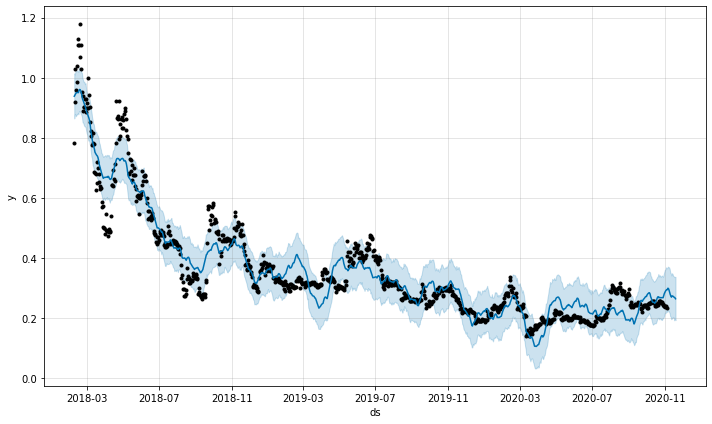

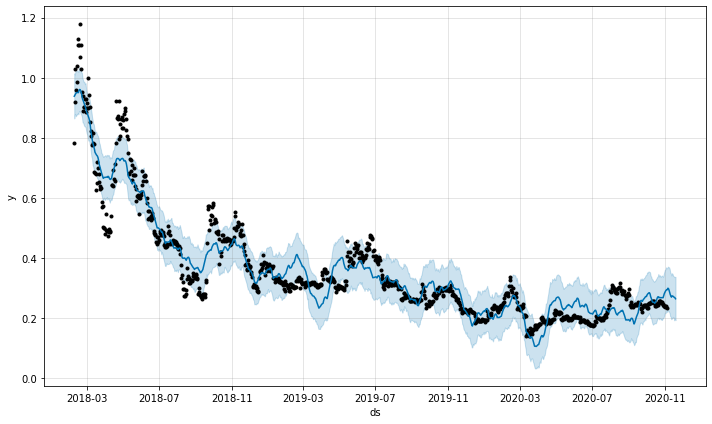

In [17]:
m.plot(prediction)

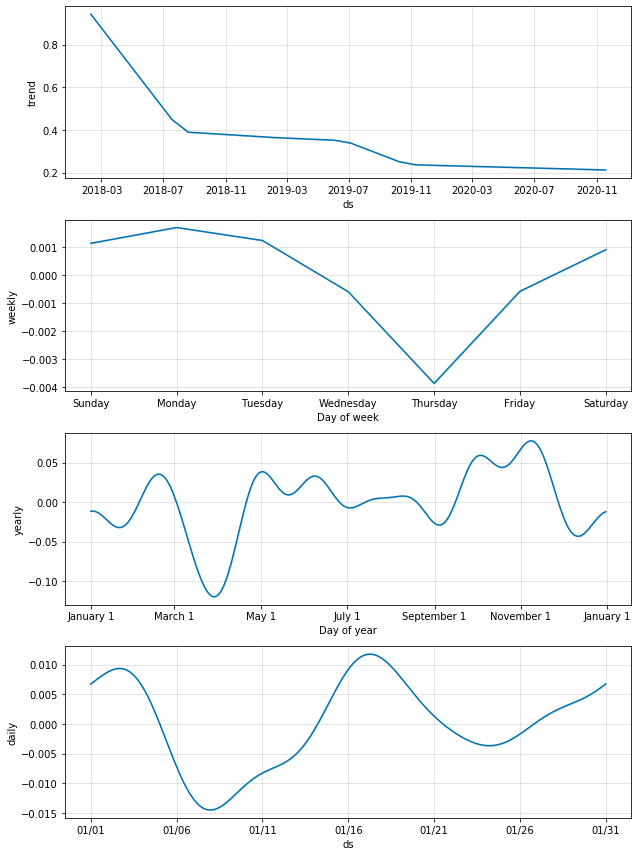

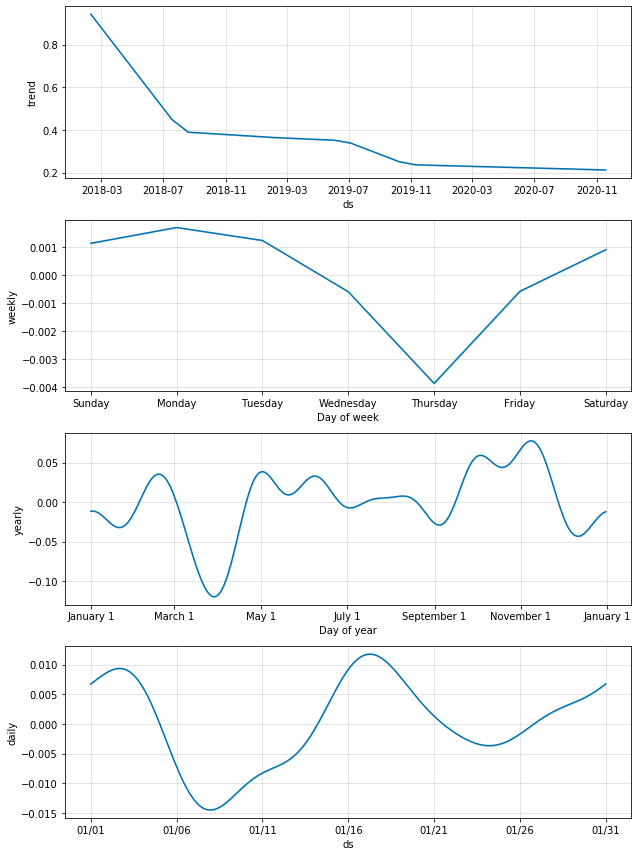

In [18]:
m.plot_components(prediction)

In [19]:
test

,time,close
801,2020-04-19,0.1893
802,2020-04-20,0.1819
803,2020-04-21,0.1838
804,2020-04-22,0.1882
805,2020-04-23,0.1925
...,...,...
996,2020-10-31,0.2399
997,2020-11-01,0.2400
998,2020-11-02,0.2356
999,2020-11-03,0.2395


In [20]:
test=test.set_index("time")

In [21]:
test=test["close"]

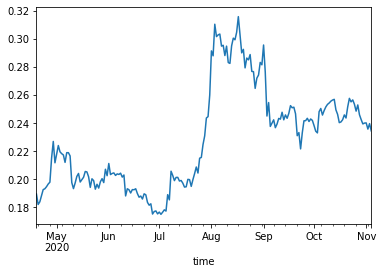

In [22]:
test.plot()

In [23]:
# find point/date for change

from fbprophet.plot import add_changepoints_to_plot

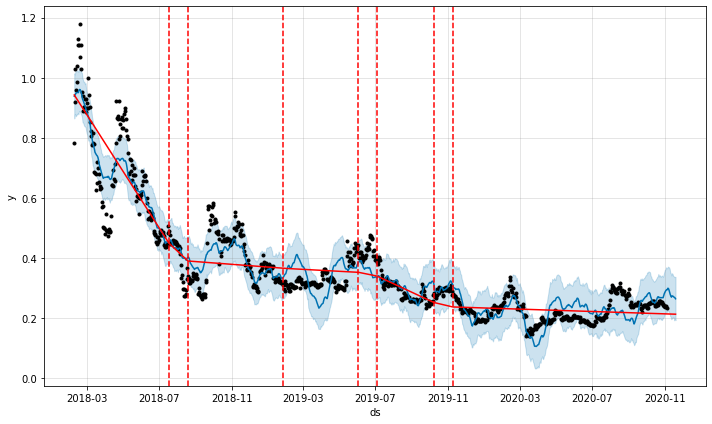

In [24]:
fig =m.plot(prediction)
c= add_changepoints_to_plot(fig.gca(),m,prediction)